## Sentimen Analisis Topik Kemiskinan Jawa Timur

In [1]:
!pip install swifter
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the dataset
import pandas as pd

file_path = 'D:\\AYO KULIAH\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\kemiskinan new.csv'
data = pd.read_csv(file_path, sep=';', on_bad_lines='skip')  # Mengabaikan baris yang bermasalah
data.head(5)
print(data)

                         created_at               id_str  \
0    Wed Aug 30 13:40:48 +0000 2023  1696880651683725368   
1    Wed Aug 30 12:48:31 +0000 2023  1696867492428431599   
2    Fri Aug 25 07:30:10 +0000 2023  1694975441331945580   
3    Thu Aug 24 08:30:00 +0000 2023  1694628109968986329   
4    Wed Aug 23 09:48:00 +0000 2023  1694285350129266804   
..                              ...                  ...   
196  Fri Jan 20 08:35:51 +0000 2023  1616353803208650753   
197  Fri Jan 20 00:00:20 +0000 2023  1616224069971742720   
198  Thu Jan 19 07:10:16 +0000 2023  1615969875243192320   
199  Thu Jan 19 06:27:24 +0000 2023  1615959090072813568   
200  Thu Jan 19 06:20:48 +0000 2023  1615957429661085697   

                                             full_text  quote_count  \
0    Beralih ke Cirebon, Kabupaten di timur laut ja...            0   
1    Banyak keberhasilan Cak @achmadfauzi_wy dalam ...            0   
2    Di Jawa Timur, angka pernikahan anak masih tin...           1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           201 non-null    object
 1   id_str               201 non-null    int64 
 2   full_text            201 non-null    object
 3   quote_count          201 non-null    int64 
 4   reply_count          201 non-null    int64 
 5   retweet_count        201 non-null    int64 
 6   favorite_count       201 non-null    int64 
 7   lang                 201 non-null    object
 8   user_id_str          201 non-null    int64 
 9   conversation_id_str  201 non-null    int64 
 10  username             201 non-null    object
 11  tweet_url            201 non-null    object
dtypes: int64(7), object(5)
memory usage: 19.0+ KB


In [5]:
data['full_text']

0      Beralih ke Cirebon, Kabupaten di timur laut ja...
1      Banyak keberhasilan Cak @achmadfauzi_wy dalam ...
2      Di Jawa Timur, angka pernikahan anak masih tin...
3      1.762 pasangan suami istri di Bojonegoro, Jawa...
4      Di Tangan Khofifah Indar Parawansa Angka Kemis...
                             ...                        
196    BPS mencatat, tingkat kemiskinan di Indonesia ...
197    [LIVE] Program Penanganan Kemiskinan Terpadu  ...
198    Informasi @bps_statistics , terkait angka kemi...
199    @Gus_Raharjo @Pangestiwerda @ridwankamil Semog...
200    Nah ini nih.. Gampang bacanya..  Yg jadi perba...
Name: full_text, Length: 201, dtype: object

In [6]:
data.columns

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')

In [7]:
del(data['created_at'])

In [8]:
del(data['id_str'])
del(data['quote_count'])
del(data['reply_count'])
del(data['retweet_count'])
del(data['favorite_count'])
del(data['lang'])
del(data['user_id_str'])
del(data['conversation_id_str'])
del(data['username'])
del(data['tweet_url'])

In [9]:
data


,full_text
0,"Beralih ke Cirebon, Kabupaten di timur laut ja..."
1,Banyak keberhasilan Cak @achmadfauzi_wy dalam ...
2,"Di Jawa Timur, angka pernikahan anak masih tin..."
3,"1.762 pasangan suami istri di Bojonegoro, Jawa..."
4,Di Tangan Khofifah Indar Parawansa Angka Kemis...
...,...
196,"BPS mencatat, tingkat kemiskinan di Indonesia ..."
197,[LIVE] Program Penanganan Kemiskinan Terpadu ...
198,"Informasi @bps_statistics , terkait angka kemi..."
199,@Gus_Raharjo @Pangestiwerda @ridwankamil Semog...


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
import csv
import swifter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk

In [11]:
df = pd.read_csv('D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\kemiskinan new.csv', sep=';', on_bad_lines='skip')

In [12]:
print('Dataset size:',df.shape)
print

Dataset size: (201, 12)


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           201 non-null    object
 1   id_str               201 non-null    int64 
 2   full_text            201 non-null    object
 3   quote_count          201 non-null    int64 
 4   reply_count          201 non-null    int64 
 5   retweet_count        201 non-null    int64 
 6   favorite_count       201 non-null    int64 
 7   lang                 201 non-null    object
 8   user_id_str          201 non-null    int64 
 9   conversation_id_str  201 non-null    int64 
 10  username             201 non-null    object
 11  tweet_url            201 non-null    object
dtypes: int64(7), object(5)
memory usage: 19.0+ KB


In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
#CLEANING TEXT
def remove_punct(text):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub('/n', ' ',text)
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub(r' +', ' ',text)
    return text

pd.set_option("display.max_colwidth", 1)
df['FULL_TEXT'] = df['full_text'].apply(lambda x: remove_punct(x))
df.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,FULL_TEXT
0,Wed Aug 30 13:40:48 +0000 2023,1696880651683725368,"Beralih ke Cirebon, Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M, nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar https://t.co/VDIyGfmi5E",0,1,0,0,in,1611579466920374277,1696880614652158350,MasUchiha_,https://twitter.com/MasUchiha_/status/1696880651683725368,Beralih ke Cirebon Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut bayangkan ada berapa individu yang tak dapat bansos padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar
1,Wed Aug 30 12:48:31 +0000 2023,1696867492428431599,"Banyak keberhasilan Cak @achmadfauzi_wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur https://t.co/CIN3qYG7SO",0,0,0,2,in,546956094,1696867463265435911,hrmnt__,https://twitter.com/hrmnt__/status/1696867492428431599,Banyak keberhasilan Cak wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur
2,Fri Aug 25 07:30:10 +0000 2023,1694975441331945580,"Di Jawa Timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. Impian terkubur, kemiskinan menyubur: Korban putus sekolah dan perkawinan anak di Jawa Timur https://t.co/C4Zy8YDAYt",15,7,200,509,in,1369663239718465538,1694975441331945580,projectm_org,https://twitter.com/projectm_org/status/1694975441331945580,Di Jawa Timur angka pernikahan anak masih tinggi dan justru meningkat selama pandemi Impian terkubur kemiskinan menyubur Korban putus sekolah dan perkawinan anak di Jawa Timur
3,Thu Aug 24 08:30:00 +0000 2023,1694628109968986329,"1.762 pasangan suami istri di Bojonegoro, Jawa Timur, mengajukan cerai di Pengadilan Agama. Tingginya tingkat perceraian disebabkan faktor kemiskinan dan pendidikan yang rendah. BIB #iNews #News #Berita #SuamiIstri #Perceraian #Kemiskinan #PendidikanRendah #Bojonegoro https://t.co/qzD9wkk2yO",0,0,0,0,in,132078023,1694628109968986329,officialinews_,https://twitter.com/officialinews_/status/1694628109968986329,1 762 pasangan suami istri di Bojonegoro Jawa Timur mengajukan cerai di Pengadilan Agama Tingginya tingkat perceraian disebabkan faktor kemiskinan dan pendidikan yang rendah BIB iNews News Berita SuamiIstri Perceraian Kemiskinan PendidikanRendah Bojonegoro
4,Wed Aug 23 09:48:00 +0000 2023,1694285350129266804,Di Tangan Khofifah Indar Parawansa Angka Kemiskinan di Jawa Timur Menurun https://t.co/R3N88Z7j66,0,0,0,3,in,2392460208,1694285350129266804,jawapos,https://twitter.com/jawapos/status/1694285350129266804,Di Tangan Khofifah Indar Parawansa Angka Kemiskinan di Jawa Timur Menurun


In [16]:
#TOKENIZATION

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['TOKENIZATION'] = df['full_text'].apply(lambda x: tokenization(x.lower()))
df.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,FULL_TEXT,TOKENIZATION
0,Wed Aug 30 13:40:48 +0000 2023,1696880651683725368,"Beralih ke Cirebon, Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M, nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar https://t.co/VDIyGfmi5E",0,1,0,0,in,1611579466920374277,1696880614652158350,MasUchiha_,https://twitter.com/MasUchiha_/status/1696880651683725368,Beralih ke Cirebon Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut bayangkan ada berapa individu yang tak dapat bansos padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar,"[beralih, ke, cirebon, kabupaten, di, timur, laut, jawa, barat, ini, miliki, anggaran, berantas, kemiskinan, 115m, nmn, sebanyak, 4m, dianggarkan, utk, perjalann, dinas, dari, 115m, tersebut, bayangkan, ada, berapa, individu, yang, tak, dapat, bansos, padahal, kab, cirebon, termasuk, 5, daerah, termiskin, di, jabar, https, t, co, vdiygfmi5e]"
1,Wed Aug 30 12:48:31 +0000 2023,1696867492428431599,"Banyak keberhasilan Cak @achmadfauzi_wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur https://t.co/CIN3qYG7SO",0,0,0,2,in,546956094,1696867463265435911,hrmnt__,https://twitter.com/hrmnt__/status/1696867492428431599,Banyak keberhasilan Cak wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur,"[banyak, keberhasilan, cak, achmadfauzi_wy, dalam, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, di, jawa, timur, juga, mampu, mewujudkan, pengangguran, terendah, di, jawa, timur, https, t, co, cin3qyg7so]"
2,Fri Aug 25 07:30:10 +0000 2023,1694975441331945580,"Di Jawa Timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. Impian terkubur, kemiskinan menyubur: Korban putus sekolah dan perkawinan anak di Jawa Timur https://t.co/C4Zy8YDAYt",15,7,200,509,in,1369663239718465538,1694975441331945580,projectm_org,https://twitter.com/projectm_org/status/1694975441331945580,Di Jawa Timur angka pernikahan anak masih tinggi dan justru meningkat selama pandemi Impian terkubur kemiskinan menyubur Korban putus sekolah dan perkawinan anak di Jawa Timur,"[di, jawa, timur, angka, pernikahan, anak, masih, tinggi, dan, justru, meningkat, selama, pandemi, impian, terkubur, kemiskinan, menyubur, korban, putus, sekolah, dan, perkawinan, anak, di, jawa, timur, https, t, co, c4zy8ydayt]"
3,Thu Aug 24 08:30:00 +0000 2023,1694628109968986329,"1.762 pasangan suami istri di Bojonegoro, Jawa Timur, mengajukan cerai di Pengadilan Agama. Tingginya tingkat perceraian disebabkan faktor kemiskinan dan pendidikan yang rendah. BIB #iNews #News #Berita #SuamiIstri #Perceraian #Kemiskinan #PendidikanRendah #Bojonegoro https://t.co/qzD9wkk2yO",0,0,0,0,in,132078023,1694628109968986329,officialinews_,https://twitter.com/officialinews_/status/1694628109968986329,1 762 pasangan suami istri di Bojonegoro Jawa Timur mengajukan cerai di Pengadilan Agama Tingginya tingkat perceraian disebabkan faktor kemiskinan dan pendidikan yang rendah BIB iNews News Berita SuamiIstri Perceraian Kemiskinan PendidikanRendah Bojonegoro,"[1, 762, pasangan, suami, istri, di, bojonegoro, jawa, timur, mengajukan, cerai, di, pengadilan, agama, tingginya, tingkat, perceraian, disebabkan, faktor, kemiskinan, dan, pendidikan, yang, rendah, bib, inews, news, berita, suamiistri, perceraian, kemiskinan, pendidikanrendah, bojonegoro, https, t, co, qzd9wkk2yo]"
4,Wed Aug 23 09:48:00 +0000 2023,16

In [17]:
#STOPREMOVAL
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('indonesian')


def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['STOP_REMOVAL'] = df['TOKENIZATION'].apply(lambda x: remove_stopwords(x))
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\REDMIBOOK-15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,Wed Aug 30 13:40:48 +0000 2023,1696880651683725368,"Beralih ke Cirebon, Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M, nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar https://t.co/VDIyGfmi5E",0,1,0,0,in,1611579466920374277,1696880614652158350,MasUchiha_,https://twitter.com/MasUchiha_/status/1696880651683725368,Beralih ke Cirebon Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut bayangkan ada berapa individu yang tak dapat bansos padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar,"[beralih, ke, cirebon, kabupaten, di, timur, laut, jawa, barat, ini, miliki, anggaran, berantas, kemiskinan, 115m, nmn, sebanyak, 4m, dianggarkan, utk, perjalann, dinas, dari, 115m, tersebut, bayangkan, ada, berapa, individu, yang, tak, dapat, bansos, padahal, kab, cirebon, termasuk, 5, daerah, termiskin, di, jabar, https, t, co, vdiygfmi5e]","[beralih, cirebon, kabupaten, timur, laut, jawa, barat, miliki, anggaran, berantas, kemiskinan, 115m, nmn, 4m, dianggarkan, utk, perjalann, dinas, 115m, bayangkan, individu, bansos, kab, cirebon, 5, daerah, termiskin, jabar, https, t, co, vdiygfmi5e]"
1,Wed Aug 30 12:48:31 +0000 2023,1696867492428431599,"Banyak keberhasilan Cak @achmadfauzi_wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur https://t.co/CIN3qYG7SO",0,0,0,2,in,546956094,1696867463265435911,hrmnt__,https://twitter.com/hrmnt__/status/1696867492428431599,Banyak keberhasilan Cak wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur,"[banyak, keberhasilan, cak, achmadfauzi_wy, dalam, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, di, jawa, timur, juga, mampu, mewujudkan, pengangguran, terendah, di, jawa, timur, https, t, co, cin3qyg7so]","[keberhasilan, cak, achmadfauzi_wy, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, jawa, timur, mewujudkan, pengangguran, terendah, jawa, timur, https, t, co, cin3qyg7so]"
2,Fri Aug 25 07:30:10 +0000 2023,1694975441331945580,"Di Jawa Timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. Impian terkubur, kemiskinan menyubur: Korban putus sekolah dan perkawinan anak di Jawa Timur https://t.co/C4Zy8YDAYt",15,7,200,509,in,1369663239718465538,1694975441331945580,projectm_org,https://twitter.com/projectm_org/status/1694975441331945580,Di Jawa Timur angka pernikahan anak masih tinggi dan justru meningkat selama pandemi Impian terkubur kemiskinan menyubur Korban putus sekolah dan perkawinan anak di Jawa Timur,"[di, jawa, timur, angka, pernikahan, anak, masih, tinggi, dan, justru, meningkat, selama, pandemi, impian, terkubur, kemiskinan, menyubur, korban, putus, sekolah, dan, perkawinan, anak, di, jawa, timur, https, t, co, c4zy8ydayt]","[jawa, timur, angka, pernikahan, anak, meningkat, pandemi, impian, terkubur, kemiskinan, menyubur, korban, putus, sekolah, perkawinan, anak, jawa, timur, https, t, co, c4zy8ydayt]"
3,Thu Aug 24 08:30:00 +0000 2023,1694628109968986329,"1.762 pasangan suami istri di Bojonegoro, Jawa Timur, mengajukan cerai di Pengadilan Agama. Tingginya tingkat perceraian disebabkan faktor kemiskinan dan pendidikan yang rendah. BIB #iNews #News #Berita #SuamiIstri #Perceraian #Kemiskinan #PendidikanRendah #Bojonegoro https://t.co/qzD9wkk2yO",0,0,0,0,in,132078023,1694628109968986329,officia

In [18]:
#CASE FOLDING
df['FULL_TEXT'] = df['full_text'].str.lower()
df.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,Wed Aug 30 13:40:48 +0000 2023,1696880651683725368,"Beralih ke Cirebon, Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M, nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar https://t.co/VDIyGfmi5E",0,1,0,0,in,1611579466920374277,1696880614652158350,MasUchiha_,https://twitter.com/MasUchiha_/status/1696880651683725368,"beralih ke cirebon, kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115m, nmn sebanyak 4m dianggarkan utk perjalann dinas dari 115m tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 daerah termiskin di jabar https://t.co/vdiygfmi5e","[beralih, ke, cirebon, kabupaten, di, timur, laut, jawa, barat, ini, miliki, anggaran, berantas, kemiskinan, 115m, nmn, sebanyak, 4m, dianggarkan, utk, perjalann, dinas, dari, 115m, tersebut, bayangkan, ada, berapa, individu, yang, tak, dapat, bansos, padahal, kab, cirebon, termasuk, 5, daerah, termiskin, di, jabar, https, t, co, vdiygfmi5e]","[beralih, cirebon, kabupaten, timur, laut, jawa, barat, miliki, anggaran, berantas, kemiskinan, 115m, nmn, 4m, dianggarkan, utk, perjalann, dinas, 115m, bayangkan, individu, bansos, kab, cirebon, 5, daerah, termiskin, jabar, https, t, co, vdiygfmi5e]"
1,Wed Aug 30 12:48:31 +0000 2023,1696867492428431599,"Banyak keberhasilan Cak @achmadfauzi_wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur https://t.co/CIN3qYG7SO",0,0,0,2,in,546956094,1696867463265435911,hrmnt__,https://twitter.com/hrmnt__/status/1696867492428431599,"banyak keberhasilan cak @achmadfauzi_wy dalam memimpin sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di jawa timur juga mampu mewujudkan pengangguran terendah di jawa timur https://t.co/cin3qyg7so","[banyak, keberhasilan, cak, achmadfauzi_wy, dalam, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, di, jawa, timur, juga, mampu, mewujudkan, pengangguran, terendah, di, jawa, timur, https, t, co, cin3qyg7so]","[keberhasilan, cak, achmadfauzi_wy, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, jawa, timur, mewujudkan, pengangguran, terendah, jawa, timur, https, t, co, cin3qyg7so]"
2,Fri Aug 25 07:30:10 +0000 2023,1694975441331945580,"Di Jawa Timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. Impian terkubur, kemiskinan menyubur: Korban putus sekolah dan perkawinan anak di Jawa Timur https://t.co/C4Zy8YDAYt",15,7,200,509,in,1369663239718465538,1694975441331945580,projectm_org,https://twitter.com/projectm_org/status/1694975441331945580,"di jawa timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. impian terkubur, kemiskinan menyubur: korban putus sekolah dan perkawinan anak di jawa timur https://t.co/c4zy8ydayt","[di, jawa, timur, angka, pernikahan, anak, masih, tinggi, dan, justru, meningkat, selama, pandemi, impian, terkubur, kemiskinan, menyubur, korban, putus, sekolah, dan, perkawinan, anak, di, jawa, timur, https, t, co, c4zy8ydayt]","[jawa, timur, angka, pernikahan, anak, meningkat, pandemi, impian, terkubur, kemiskinan, menyubur, korban, putus, sekolah, perkawinan, anak, jawa, timur, https, t, co, c4zy8ydayt]"
3,Thu Aug 24 08:30:00 +0000 2023,1694628109968986329,"1.762 pasangan suami istri di Bojonegoro, Jawa Timur, mengajukan cerai di Pengadilan Agama. Tingginya tingkat perceraian disebabkan faktor kemiskinan dan pendidikan yang rendah. BIB #iNews #News #Berita #SuamiIstri #Perceraian #Kemiskinan #Pe

In [19]:
df.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,Wed Aug 30 13:40:48 +0000 2023,1696880651683725368,"Beralih ke Cirebon, Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M, nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar https://t.co/VDIyGfmi5E",0,1,0,0,in,1611579466920374277,1696880614652158350,MasUchiha_,https://twitter.com/MasUchiha_/status/1696880651683725368,"beralih ke cirebon, kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115m, nmn sebanyak 4m dianggarkan utk perjalann dinas dari 115m tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 daerah termiskin di jabar https://t.co/vdiygfmi5e","[beralih, ke, cirebon, kabupaten, di, timur, laut, jawa, barat, ini, miliki, anggaran, berantas, kemiskinan, 115m, nmn, sebanyak, 4m, dianggarkan, utk, perjalann, dinas, dari, 115m, tersebut, bayangkan, ada, berapa, individu, yang, tak, dapat, bansos, padahal, kab, cirebon, termasuk, 5, daerah, termiskin, di, jabar, https, t, co, vdiygfmi5e]","[beralih, cirebon, kabupaten, timur, laut, jawa, barat, miliki, anggaran, berantas, kemiskinan, 115m, nmn, 4m, dianggarkan, utk, perjalann, dinas, 115m, bayangkan, individu, bansos, kab, cirebon, 5, daerah, termiskin, jabar, https, t, co, vdiygfmi5e]"
1,Wed Aug 30 12:48:31 +0000 2023,1696867492428431599,"Banyak keberhasilan Cak @achmadfauzi_wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur https://t.co/CIN3qYG7SO",0,0,0,2,in,546956094,1696867463265435911,hrmnt__,https://twitter.com/hrmnt__/status/1696867492428431599,"banyak keberhasilan cak @achmadfauzi_wy dalam memimpin sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di jawa timur juga mampu mewujudkan pengangguran terendah di jawa timur https://t.co/cin3qyg7so","[banyak, keberhasilan, cak, achmadfauzi_wy, dalam, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, di, jawa, timur, juga, mampu, mewujudkan, pengangguran, terendah, di, jawa, timur, https, t, co, cin3qyg7so]","[keberhasilan, cak, achmadfauzi_wy, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, jawa, timur, mewujudkan, pengangguran, terendah, jawa, timur, https, t, co, cin3qyg7so]"
2,Fri Aug 25 07:30:10 +0000 2023,1694975441331945580,"Di Jawa Timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. Impian terkubur, kemiskinan menyubur: Korban putus sekolah dan perkawinan anak di Jawa Timur https://t.co/C4Zy8YDAYt",15,7,200,509,in,1369663239718465538,1694975441331945580,projectm_org,https://twitter.com/projectm_org/status/1694975441331945580,"di jawa timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. impian terkubur, kemiskinan menyubur: korban putus sekolah dan perkawinan anak di jawa timur https://t.co/c4zy8ydayt","[di, jawa, timur, angka, pernikahan, anak, masih, tinggi, dan, justru, meningkat, selama, pandemi, impian, terkubur, kemiskinan, menyubur, korban, putus, sekolah, dan, perkawinan, anak, di, jawa, timur, https, t, co, c4zy8ydayt]","[jawa, timur, angka, pernikahan, anak, meningkat, pandemi, impian, terkubur, kemiskinan, menyubur, korban, putus, sekolah, perkawinan, anak, jawa, timur, https, t, co, c4zy8ydayt]"
3,Thu Aug 24 08:30:00 +0000 2023,1694628109968986329,"1.762 pasangan suami istri di Bojonegoro, Jawa Timur, mengajukan cerai di Pengadilan Agama. Tingginya tingkat perceraian disebabkan faktor kemiskinan dan pendidikan yang rendah. BIB #iNews #News #Berita #SuamiIstri #Perceraian #Kemiskinan #Pe

In [20]:
stop_removal = df[['STOP_REMOVAL']]

def fit_stopwords(text):
    text = np.array(text)
    text = ' '.join(text)
    return text

df['STOP_REMOVAL'] = df['STOP_REMOVAL'].apply(lambda x: fit_stopwords(x))

In [19]:
# WORD NORMALIZATION
# Download corpus kumpulan slangwords
import urllib.request

url = "https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv"
output_file = "kamus_singkatan.csv"

urllib.request.urlretrieve(url, output_file)
print("File downloaded successfully.")


File downloaded successfully.


In [21]:
# berikut adalah kamus slang words dari Meisa Putri yang saya dapat di github
key_norm = pd.read_csv('kamus_singkatan.csv', sep=';', header=None)
key_norm.columns=['singkat','hasil']
print(key_norm.head())

key_norm.shape

   singkat     hasil
0  aamiin   amin    
1  adek     adik    
2  adlh     adalah  
3  aer      air     
4  aiskrim  es krim 


(1309, 2)

In [22]:
# buat fungsi text normalize untuk mengubah kata singkat/kata tak baku menjadi kata baku
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [23]:
df['normalization'] = df['STOP_REMOVAL'].apply(lambda x: text_normalize(x))

In [24]:
#STEMMING
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

df['STEMMING'] = df['normalization'].apply(lambda x: stemming(x))
df.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,FULL_TEXT,TOKENIZATION,STOP_REMOVAL,normalization,STEMMING
0,Wed Aug 30 13:40:48 +0000 2023,1696880651683725368,"Beralih ke Cirebon, Kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115M, nmn sebanyak 4M dianggarkan utk perjalann dinas dari 115M tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 Daerah Termiskin di Jabar https://t.co/VDIyGfmi5E",0,1,0,0,in,1611579466920374277,1696880614652158350,MasUchiha_,https://twitter.com/MasUchiha_/status/1696880651683725368,"beralih ke cirebon, kabupaten di timur laut jawa barat ini miliki anggaran berantas kemiskinan 115m, nmn sebanyak 4m dianggarkan utk perjalann dinas dari 115m tersebut, bayangkan ada berapa individu yang tak dapat bansos, padahal kab cirebon termasuk 5 daerah termiskin di jabar https://t.co/vdiygfmi5e","[beralih, ke, cirebon, kabupaten, di, timur, laut, jawa, barat, ini, miliki, anggaran, berantas, kemiskinan, 115m, nmn, sebanyak, 4m, dianggarkan, utk, perjalann, dinas, dari, 115m, tersebut, bayangkan, ada, berapa, individu, yang, tak, dapat, bansos, padahal, kab, cirebon, termasuk, 5, daerah, termiskin, di, jabar, https, t, co, vdiygfmi5e]",beralih cirebon kabupaten timur laut jawa barat miliki anggaran berantas kemiskinan 115m nmn 4m dianggarkan utk perjalann dinas 115m bayangkan individu bansos kab cirebon 5 daerah termiskin jabar https t co vdiygfmi5e,beralih cirebon kabupaten timur laut jawa barat miliki anggaran berantas kemiskinan 115m nmn 4m dianggarkan untuk perjalann dinas 115m bayangkan individu bansos kab cirebon 5 daerah termiskin jabar https t co vdiygfmi5e,alih cirebon kabupaten timur laut jawa barat milik anggar berantas miskin 115m nmn 4m anggar untuk perjalann dinas 115m bayang individu bansos kab cirebon 5 daerah miskin jabar https t co vdiygfmi5e
1,Wed Aug 30 12:48:31 +0000 2023,1696867492428431599,"Banyak keberhasilan Cak @achmadfauzi_wy dalam memimpin Sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di Jawa Timur Juga mampu mewujudkan pengangguran terendah di Jawa Timur https://t.co/CIN3qYG7SO",0,0,0,2,in,546956094,1696867463265435911,hrmnt__,https://twitter.com/hrmnt__/status/1696867492428431599,"banyak keberhasilan cak @achmadfauzi_wy dalam memimpin sumenep salah satunya menurunkan angka kemiskinan, penurunan angka kemiskinan tertinggi di jawa timur juga mampu mewujudkan pengangguran terendah di jawa timur https://t.co/cin3qyg7so","[banyak, keberhasilan, cak, achmadfauzi_wy, dalam, memimpin, sumenep, salah, satunya, menurunkan, angka, kemiskinan, penurunan, angka, kemiskinan, tertinggi, di, jawa, timur, juga, mampu, mewujudkan, pengangguran, terendah, di, jawa, timur, https, t, co, cin3qyg7so]",keberhasilan cak achmadfauzi_wy memimpin sumenep salah satunya menurunkan angka kemiskinan penurunan angka kemiskinan tertinggi jawa timur mewujudkan pengangguran terendah jawa timur https t co cin3qyg7so,keberhasilan cak achmadfauzi_wy memimpin sumenep salah satunya menurunkan angka kemiskinan penurunan angka kemiskinan tertinggi jawa timur mewujudkan pengangguran terendah jawa timur https t co cin3qyg7so,hasil cak achmadfauzi wy pimpin sumenep salah satu turun angka miskin turun angka miskin tinggi jawa timur wujud anggur rendah jawa timur https t co cin3qyg7so
2,Fri Aug 25 07:30:10 +0000 2023,1694975441331945580,"Di Jawa Timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. Impian terkubur, kemiskinan menyubur: Korban putus sekolah dan perkawinan anak di Jawa Timur https://t.co/C4Zy8YDAYt",15,7,200,509,in,1369663239718465538,1694975441331945580,projectm_org,https://twitter.com/projectm_org/status/1694975441331945580,"di jawa timur, angka pernikahan anak masih tinggi dan justru meningkat selama pandemi. impian terkubur, kemiskinan menyubur: korban putus sekolah dan perkawinan anak di j

In [25]:
df = df['STEMMING']
df.head(5)

0    alih cirebon kabupaten timur laut jawa barat milik anggar berantas miskin 115m nmn 4m anggar untuk perjalann dinas 115m bayang individu bansos kab cirebon 5 daerah miskin jabar https t co vdiygfmi5e                   
1    hasil cak achmadfauzi wy pimpin sumenep salah satu turun angka miskin turun angka miskin tinggi jawa timur wujud anggur rendah jawa timur https t co cin3qyg7so                                                          
2    jawa timur angka nikah anak tingkat pandemi impi kubur miskin subur korban putus sekolah kawin anak jawa timur https t co c4zy8ydayt                                                                                     
3    1 762 pasang suami istri bojonegoro jawa timur aju cerai adil agama tinggi tingkat cerai sebab faktor miskin didik rendah bib inews news berita suamiistri cerai miskin pendidikanrendah bojonegoro https t co qzd9wkk2yo
4    tangan khofifah indar parawansa angka miskin jawa timur turun https t co r3n88z7j66                    

In [26]:
df.to_csv('HASILnew1.csv', index = False)

## KAMUS LEXICON

In [37]:
import pandas as pd
import numpy as np

In [38]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    
    polarity = -1 if score < 0 else 1  # Set polarity to -1 for negative and 1 for positive
    return score, polarity



In [42]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 1
    elif (score < 0):
        polarity = -1
    else:
        polarity = 0
    return score, polarity

In [39]:
data = pd.read_csv('D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\HASILnew1.csv')

In [40]:
data

,STEMMING
0,alih cirebon kabupaten timur laut jawa barat milik anggar berantas miskin 115m nmn 4m anggar untuk perjalann dinas 115m bayang individu bansos kab cirebon 5 daerah miskin jabar https t co vdiygfmi5e
1,hasil cak achmadfauzi wy pimpin sumenep salah satu turun angka miskin turun angka miskin tinggi jawa timur wujud anggur rendah jawa timur https t co cin3qyg7so
2,jawa timur angka nikah anak tingkat pandemi impi kubur miskin subur korban putus sekolah kawin anak jawa timur https t co c4zy8ydayt
3,1 762 pasang suami istri bojonegoro jawa timur aju cerai adil agama tinggi tingkat cerai sebab faktor miskin didik rendah bib inews news berita suamiistri cerai miskin pendidikanrendah bojonegoro https t co qzd9wkk2yo
4,tangan khofifah indar parawansa angka miskin jawa timur turun https t co r3n88z7j66
...,...
196,bps catat tingkat miskin indonesia capai 9 57 persen 1 diy 11 49 persen 2 jawa 10 98 persen 3 jawa timur 10 49 persen 4 jawa barat 7 98 persen 5 banten 6 24 persen 6 dki jakarta 4 61 persen source kompas yuk yuk semangat kerja guys https t co jufdb2rggx
197,live program tangan miskin padu jumat 20 januari 2023 08 00 wib siar langsung kantor camat pujon kabupaten malang jawa timur youtube kemensosri https t co nqehejhys8 https t co ilp3gtekay
198,informasi bps statistics kait angka miskin 3 provinsi pulau jawa periode 2018 2022 provinsi jawa timur turun 0 36 56 000 orang provinsi jawa turun 0 21 10 000 orang provinsi jawa barat 0 74 510 000 orang https t co zm5glxhkpi
199,gus raharjo pangestiwerda ridwankamil moga angka miskin atas perintah daerah jawa barat saya susul jawa timur jawa


In [41]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\REDMIBOOK-15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
data['STEMMING'] =pd.Series(data['STEMMING'],dtype="string")

In [43]:
data['STEMMING'] = data['STEMMING'].replace(np.nan, '')

In [44]:
data['tokenized_sents'] = data.apply(lambda row: word_tokenize(row['STEMMING']), axis=1)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STEMMING         201 non-null    string
 1   tokenized_sents  201 non-null    object
dtypes: object(1), string(1)
memory usage: 3.3+ KB


In [46]:
results = data['tokenized_sents'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['polarity'] = results[1]
print(data['polarity'].value_counts())

polarity
-1    181
 1    20 
Name: count, dtype: int64


In [47]:
data

,STEMMING,tokenized_sents,polarity
0,alih cirebon kabupaten timur laut jawa barat milik anggar berantas miskin 115m nmn 4m anggar untuk perjalann dinas 115m bayang individu bansos kab cirebon 5 daerah miskin jabar https t co vdiygfmi5e,"[alih, cirebon, kabupaten, timur, laut, jawa, barat, milik, anggar, berantas, miskin, 115m, nmn, 4m, anggar, untuk, perjalann, dinas, 115m, bayang, individu, bansos, kab, cirebon, 5, daerah, miskin, jabar, https, t, co, vdiygfmi5e]",1
1,hasil cak achmadfauzi wy pimpin sumenep salah satu turun angka miskin turun angka miskin tinggi jawa timur wujud anggur rendah jawa timur https t co cin3qyg7so,"[hasil, cak, achmadfauzi, wy, pimpin, sumenep, salah, satu, turun, angka, miskin, turun, angka, miskin, tinggi, jawa, timur, wujud, anggur, rendah, jawa, timur, https, t, co, cin3qyg7so]",-1
2,jawa timur angka nikah anak tingkat pandemi impi kubur miskin subur korban putus sekolah kawin anak jawa timur https t co c4zy8ydayt,"[jawa, timur, angka, nikah, anak, tingkat, pandemi, impi, kubur, miskin, subur, korban, putus, sekolah, kawin, anak, jawa, timur, https, t, co, c4zy8ydayt]",-1
3,1 762 pasang suami istri bojonegoro jawa timur aju cerai adil agama tinggi tingkat cerai sebab faktor miskin didik rendah bib inews news berita suamiistri cerai miskin pendidikanrendah bojonegoro https t co qzd9wkk2yo,"[1, 762, pasang, suami, istri, bojonegoro, jawa, timur, aju, cerai, adil, agama, tinggi, tingkat, cerai, sebab, faktor, miskin, didik, rendah, bib, inews, news, berita, suamiistri, cerai, miskin, pendidikanrendah, bojonegoro, https, t, co, qzd9wkk2yo]",-1
4,tangan khofifah indar parawansa angka miskin jawa timur turun https t co r3n88z7j66,"[tangan, khofifah, indar, parawansa, angka, miskin, jawa, timur, turun, https, t, co, r3n88z7j66]",-1
...,...,...,...
196,bps catat tingkat miskin indonesia capai 9 57 persen 1 diy 11 49 persen 2 jawa 10 98 persen 3 jawa timur 10 49 persen 4 jawa barat 7 98 persen 5 banten 6 24 persen 6 dki jakarta 4 61 persen source kompas yuk yuk semangat kerja guys https t co jufdb2rggx,"[bps, catat, tingkat, miskin, indonesia, capai, 9, 57, persen, 1, diy, 11, 49, persen, 2, jawa, 10, 98, persen, 3, jawa, timur, 10, 49, persen, 4, jawa, barat, 7, 98, persen, 5, banten, 6, 24, persen, 6, dki, jakarta, 4, 61, persen, source, kompas, yuk, yuk, semangat, kerja, guys, https, t, co, jufdb2rggx]",1
197,live program tangan miskin padu jumat 20 januari 2023 08 00 wib siar langsung kantor camat pujon kabupaten malang jawa timur youtube kemensosri https t co nqehejhys8 https t co ilp3gtekay,"[live, program, tangan, miskin, padu, jumat, 20, januari, 2023, 08, 00, wib, siar, langsung, kantor, camat, pujon, kabupaten, malang, jawa, timur, youtube, kemensosri, https, t, co, nqehejhys8, https, t, co, ilp3gtekay]",-1
198,informasi bps statistics kait angka miskin 3 provinsi pulau jawa periode 2018 2022 provinsi jawa timur turun 0 36 56 000 orang provinsi jawa turun 0 21 10 000 orang provinsi jawa barat 0 74 510 000 orang https t co zm5glxhkpi,"[informasi, bps, statistics, kait, angka, miskin, 3, provinsi, pulau, jawa, periode, 2018, 2022, provinsi, jawa, timur, turun, 0, 36, 56, 000, orang, provinsi, jawa, turun, 0, 21, 10, 000, orang, provinsi, jawa, barat, 0, 74, 510, 000, orang, https, t, co, zm5glxhkpi]",-1
199,gus raharjo pangestiwerda ridwankamil moga angka miskin atas perintah daerah jawa barat saya susul jawa timur jawa,"[gus, raharjo, pangestiwerda, ridwankamil, moga, angka, miskin, atas, perintah, daerah, jawa, barat, saya, susul, jawa, timur, jawa]",-1


In [48]:
# Export to csv file
data.to_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Hasil2kelas.csv', index = False, header = True,index_label=None)

data

,STEMMING,tokenized_sents,polarity
0,alih cirebon kabupaten timur laut jawa barat milik anggar berantas miskin 115m nmn 4m anggar untuk perjalann dinas 115m bayang individu bansos kab cirebon 5 daerah miskin jabar https t co vdiygfmi5e,"[alih, cirebon, kabupaten, timur, laut, jawa, barat, milik, anggar, berantas, miskin, 115m, nmn, 4m, anggar, untuk, perjalann, dinas, 115m, bayang, individu, bansos, kab, cirebon, 5, daerah, miskin, jabar, https, t, co, vdiygfmi5e]",1
1,hasil cak achmadfauzi wy pimpin sumenep salah satu turun angka miskin turun angka miskin tinggi jawa timur wujud anggur rendah jawa timur https t co cin3qyg7so,"[hasil, cak, achmadfauzi, wy, pimpin, sumenep, salah, satu, turun, angka, miskin, turun, angka, miskin, tinggi, jawa, timur, wujud, anggur, rendah, jawa, timur, https, t, co, cin3qyg7so]",-1
2,jawa timur angka nikah anak tingkat pandemi impi kubur miskin subur korban putus sekolah kawin anak jawa timur https t co c4zy8ydayt,"[jawa, timur, angka, nikah, anak, tingkat, pandemi, impi, kubur, miskin, subur, korban, putus, sekolah, kawin, anak, jawa, timur, https, t, co, c4zy8ydayt]",-1
3,1 762 pasang suami istri bojonegoro jawa timur aju cerai adil agama tinggi tingkat cerai sebab faktor miskin didik rendah bib inews news berita suamiistri cerai miskin pendidikanrendah bojonegoro https t co qzd9wkk2yo,"[1, 762, pasang, suami, istri, bojonegoro, jawa, timur, aju, cerai, adil, agama, tinggi, tingkat, cerai, sebab, faktor, miskin, didik, rendah, bib, inews, news, berita, suamiistri, cerai, miskin, pendidikanrendah, bojonegoro, https, t, co, qzd9wkk2yo]",-1
4,tangan khofifah indar parawansa angka miskin jawa timur turun https t co r3n88z7j66,"[tangan, khofifah, indar, parawansa, angka, miskin, jawa, timur, turun, https, t, co, r3n88z7j66]",-1
...,...,...,...
196,bps catat tingkat miskin indonesia capai 9 57 persen 1 diy 11 49 persen 2 jawa 10 98 persen 3 jawa timur 10 49 persen 4 jawa barat 7 98 persen 5 banten 6 24 persen 6 dki jakarta 4 61 persen source kompas yuk yuk semangat kerja guys https t co jufdb2rggx,"[bps, catat, tingkat, miskin, indonesia, capai, 9, 57, persen, 1, diy, 11, 49, persen, 2, jawa, 10, 98, persen, 3, jawa, timur, 10, 49, persen, 4, jawa, barat, 7, 98, persen, 5, banten, 6, 24, persen, 6, dki, jakarta, 4, 61, persen, source, kompas, yuk, yuk, semangat, kerja, guys, https, t, co, jufdb2rggx]",1
197,live program tangan miskin padu jumat 20 januari 2023 08 00 wib siar langsung kantor camat pujon kabupaten malang jawa timur youtube kemensosri https t co nqehejhys8 https t co ilp3gtekay,"[live, program, tangan, miskin, padu, jumat, 20, januari, 2023, 08, 00, wib, siar, langsung, kantor, camat, pujon, kabupaten, malang, jawa, timur, youtube, kemensosri, https, t, co, nqehejhys8, https, t, co, ilp3gtekay]",-1
198,informasi bps statistics kait angka miskin 3 provinsi pulau jawa periode 2018 2022 provinsi jawa timur turun 0 36 56 000 orang provinsi jawa turun 0 21 10 000 orang provinsi jawa barat 0 74 510 000 orang https t co zm5glxhkpi,"[informasi, bps, statistics, kait, angka, miskin, 3, provinsi, pulau, jawa, periode, 2018, 2022, provinsi, jawa, timur, turun, 0, 36, 56, 000, orang, provinsi, jawa, turun, 0, 21, 10, 000, orang, provinsi, jawa, barat, 0, 74, 510, 000, orang, https, t, co, zm5glxhkpi]",-1
199,gus raharjo pangestiwerda ridwankamil moga angka miskin atas perintah daerah jawa barat saya susul jawa timur jawa,"[gus, raharjo, pangestiwerda, ridwankamil, moga, angka, miskin, atas, perintah, daerah, jawa, barat, saya, susul, jawa, timur, jawa]",-1


## Worldcloud
adalah suatu teknik visualisasi yang digunakan untuk menampilkan kata-kata dari teks, di mana kata-kata yang paling sering muncul akan ditampilkan dengan ukuran teks yang lebih besar dan menarik.

In [49]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style = 'whitegrid')

In [51]:
# load data berlabel
data = pd.read_csv('Hasil2kelas.csv')

In [52]:
data

,STEMMING,tokenized_sents,polarity
0,alih cirebon kabupaten timur laut jawa barat milik anggar berantas miskin 115m nmn 4m anggar untuk perjalann dinas 115m bayang individu bansos kab cirebon 5 daerah miskin jabar https t co vdiygfmi5e,"['alih', 'cirebon', 'kabupaten', 'timur', 'laut', 'jawa', 'barat', 'milik', 'anggar', 'berantas', 'miskin', '115m', 'nmn', '4m', 'anggar', 'untuk', 'perjalann', 'dinas', '115m', 'bayang', 'individu', 'bansos', 'kab', 'cirebon', '5', 'daerah', 'miskin', 'jabar', 'https', 't', 'co', 'vdiygfmi5e']",1
1,hasil cak achmadfauzi wy pimpin sumenep salah satu turun angka miskin turun angka miskin tinggi jawa timur wujud anggur rendah jawa timur https t co cin3qyg7so,"['hasil', 'cak', 'achmadfauzi', 'wy', 'pimpin', 'sumenep', 'salah', 'satu', 'turun', 'angka', 'miskin', 'turun', 'angka', 'miskin', 'tinggi', 'jawa', 'timur', 'wujud', 'anggur', 'rendah', 'jawa', 'timur', 'https', 't', 'co', 'cin3qyg7so']",-1
2,jawa timur angka nikah anak tingkat pandemi impi kubur miskin subur korban putus sekolah kawin anak jawa timur https t co c4zy8ydayt,"['jawa', 'timur', 'angka', 'nikah', 'anak', 'tingkat', 'pandemi', 'impi', 'kubur', 'miskin', 'subur', 'korban', 'putus', 'sekolah', 'kawin', 'anak', 'jawa', 'timur', 'https', 't', 'co', 'c4zy8ydayt']",-1
3,1 762 pasang suami istri bojonegoro jawa timur aju cerai adil agama tinggi tingkat cerai sebab faktor miskin didik rendah bib inews news berita suamiistri cerai miskin pendidikanrendah bojonegoro https t co qzd9wkk2yo,"['1', '762', 'pasang', 'suami', 'istri', 'bojonegoro', 'jawa', 'timur', 'aju', 'cerai', 'adil', 'agama', 'tinggi', 'tingkat', 'cerai', 'sebab', 'faktor', 'miskin', 'didik', 'rendah', 'bib', 'inews', 'news', 'berita', 'suamiistri', 'cerai', 'miskin', 'pendidikanrendah', 'bojonegoro', 'https', 't', 'co', 'qzd9wkk2yo']",-1
4,tangan khofifah indar parawansa angka miskin jawa timur turun https t co r3n88z7j66,"['tangan', 'khofifah', 'indar', 'parawansa', 'angka', 'miskin', 'jawa', 'timur', 'turun', 'https', 't', 'co', 'r3n88z7j66']",-1
...,...,...,...
196,bps catat tingkat miskin indonesia capai 9 57 persen 1 diy 11 49 persen 2 jawa 10 98 persen 3 jawa timur 10 49 persen 4 jawa barat 7 98 persen 5 banten 6 24 persen 6 dki jakarta 4 61 persen source kompas yuk yuk semangat kerja guys https t co jufdb2rggx,"['bps', 'catat', 'tingkat', 'miskin', 'indonesia', 'capai', '9', '57', 'persen', '1', 'diy', '11', '49', 'persen', '2', 'jawa', '10', '98', 'persen', '3', 'jawa', 'timur', '10', '49', 'persen', '4', 'jawa', 'barat', '7', '98', 'persen', '5', 'banten', '6', '24', 'persen', '6', 'dki', 'jakarta', '4', '61', 'persen', 'source', 'kompas', 'yuk', 'yuk', 'semangat', 'kerja', 'guys', 'https', 't', 'co', 'jufdb2rggx']",1
197,live program tangan miskin padu jumat 20 januari 2023 08 00 wib siar langsung kantor camat pujon kabupaten malang jawa timur youtube kemensosri https t co nqehejhys8 https t co ilp3gtekay,"['live', 'program', 'tangan', 'miskin', 'padu', 'jumat', '20', 'januari', '2023', '08', '00', 'wib', 'siar', 'langsung', 'kantor', 'camat', 'pujon', 'kabupaten', 'malang', 'jawa', 'timur', 'youtube', 'kemensosri', 'https', 't', 'co', 'nqehejhys8', 'https', 't', 'co', 'ilp3gtekay']",-1
198,informasi bps statistics kait angka miskin 3 provinsi pulau jawa periode 2018 2022 provinsi jawa timur turun 0 36 56 000 orang provinsi jawa turun 0 21 10 000 orang provinsi jawa barat 0 74 510 000 orang https t co zm5glxhkpi,"['informasi', 'bps', 'statistics', 'kait', 'angka', 'miskin', '3', 'provinsi', 'pulau', 'jawa', 'periode', '2018', '2022', 'provinsi', 'jawa', 'timur', 'turun', '0', '36', '56', '000', 'orang', 'provinsi', 'jawa', 'turun', '0', '21', '10', '000', 'orang', 'provinsi', 'jawa', 'barat', '0', '74', '510', '000', 'orang', 'https', 't', 'co', 'zm5glxhkpi']",-1
199,gus raharjo pangestiwerda ridwankamil moga angka miskin atas perintah daerah jawa barat saya susul jawa timur jawa,"['gus', 'raharjo', 'pangestiwerda', 'ridwankamil', 'moga', 'angka', 'miskin', 'at

In [53]:
#define negative and positive
negatif = data.loc[data['polarity'] == -1]
positif  = data.loc[data['polarity'] == 1]


In [54]:
all_ = "".join(data.tokenized_sents.values) # untuk semua kata
all_negatif = "".join(negatif.tokenized_sents.values) # untuk kata negatif
all_positif = "".join(positif.tokenized_sents.values) # untuk kata positif


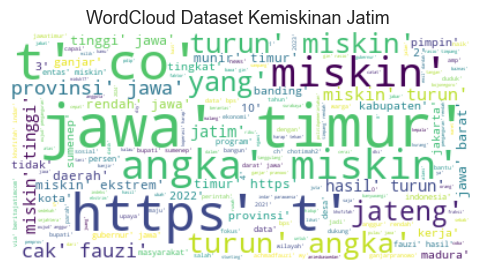

In [55]:
# word cloud untuk semua kata
cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(all_)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Dataset Kemiskinan Jatim ', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

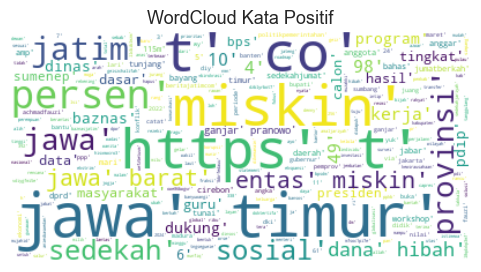

In [56]:
# word cloud untuk kata positif
cloud = WordCloud(background_color = "white", max_words = 500, stopwords = set(STOPWORDS)).generate(all_positif)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Positif', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

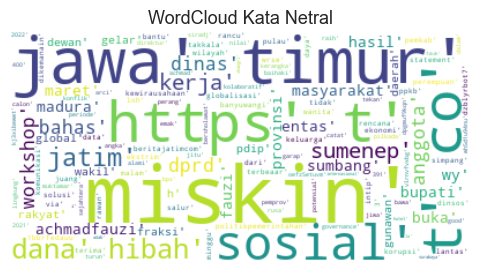

In [61]:
# word cloud untukkata netral
cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(all_netral)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Netral', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

## worldcloud kata negatif 

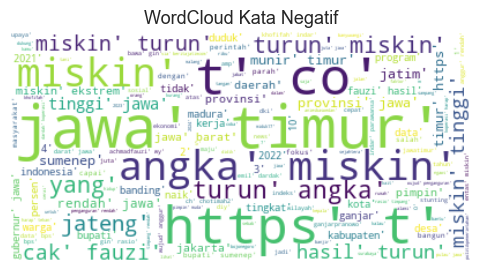

In [57]:
# word cloud untukkata negative
cloud = WordCloud(background_color = "white", max_words = 500, stopwords = set(STOPWORDS)).generate(all_negatif)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Negatif', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()